In [3]:
from sklearn import datasets
import numpy as np
import pandas as pd
%matplotlib inline

In [4]:
iris = datasets.load_iris()

In [5]:
X = iris.data[:, [2,3]]
y = iris.target

In [6]:
np.unique(y)

array([0, 1, 2])

#### split data set further into training and test set

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### feature scaling our data by standardizing it

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### train a perception model

In [9]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

#### make prediction

In [10]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 4


In [11]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.91


# Testing on Titanic data set using age

    perceptron algorithm never converges on datasets that aren't perfectly linearly separable, 
    which is why the use of the perceptron algorithm is typically not recommended in practice

In [10]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [11]:
train_df = pd.DataFrame([train["Age"].fillna(train["Age"].mean()),train["Fare"], train["Survived"]])
train_df = train_df.transpose()
train_df.head()
train_df['Age'].head()

0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: float64

In [12]:
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(np.array(train_df["Age"]).reshape(-1,1), 
                                                                                    np.array(train_df["Survived"]).reshape(-1,1), 
                                                                                    test_size=0.3, 
                                                                                    random_state=0)

In [13]:
sc2 = StandardScaler()
sc2.fit(X_train_titanic)
train_fare_std = sc2.transform(X_train_titanic)
test_fare_std = sc2.transform(X_test_titanic)

In [24]:
titanic_ppn = Perceptron(n_iter=25, eta0=.01, random_state=0)
titanic_ppn.fit(train_fare_std, y_train_titanic.ravel())

Perceptron(alpha=0.0001, class_weight=None, eta0=0.01, fit_intercept=True,
      n_iter=25, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [25]:
titanic_pred = titanic_ppn.predict(test_fare_std)
print('Misclassified samples: %d' % (y_test_titanic.ravel() != titanic_pred).sum())
print("Accuracy score: %.2f" %accuracy_score(y_test_titanic.ravel(),titanic_pred))

Misclassified samples: 100
Accuracy score: 0.63


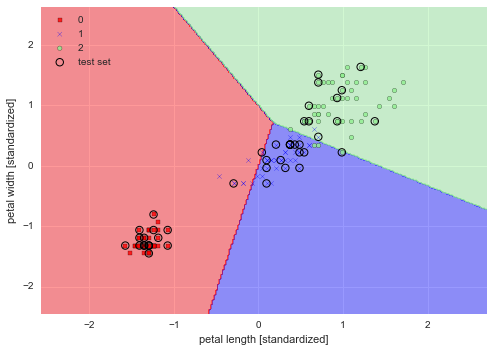

In [12]:
from decision_regions_with_test_samples import (plot_decision_regions,plt)
>>> X_combined_std = np.vstack((X_train_std, X_test_std))
>>> y_combined = np.hstack((y_train, y_test))
>>> plot_decision_regions(X=X_combined_std,
...                       y=y_combined,
...                       classifier=ppn,
...                       test_idx=range(105,150))
>>> plt.xlabel('petal length [standardized]')
>>> plt.ylabel('petal width [standardized]')
>>> plt.legend(loc='upper left')
>>> plt.show()

### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=0,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

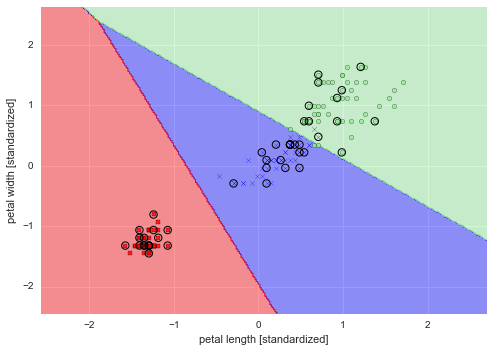

In [14]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.show()

In [17]:
lr.predict_proba(X_test_std[0,:])

/Users/slackoverflow/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

### Support Vector Machine

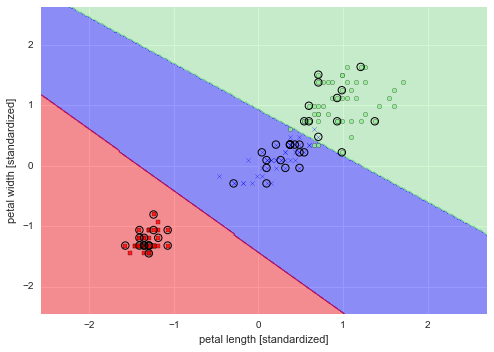

In [18]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel("petal length [standardized]")
plt.ylabel("petal width [standardized]")
plt.show()